**1.导入需要的模块和库**

In [1]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**2.导入数据，探索数据**

In [2]:
data = pd.read_csv('02digit recognizor.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(42000, 785)

In [4]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
X.shape

(42000, 784)

**3.画累计方差贡献率曲线，找最佳降维后维度的范围**

In [5]:
pca_line = PCA().fit(X) #实例化+拟合

In [6]:
pca_line.explained_variance_ratio_.shape

(784,)

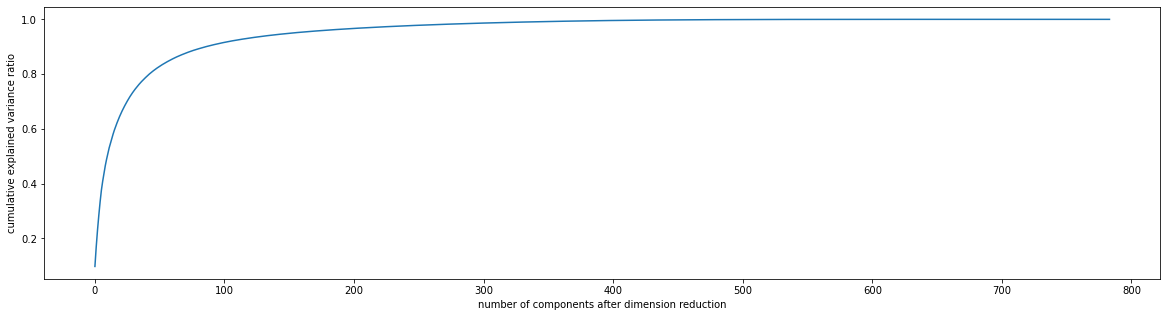

In [7]:
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show() #选转折点作为n_components的取值

**4.降维后维度的学习曲线，继续缩小最佳维度的范围**

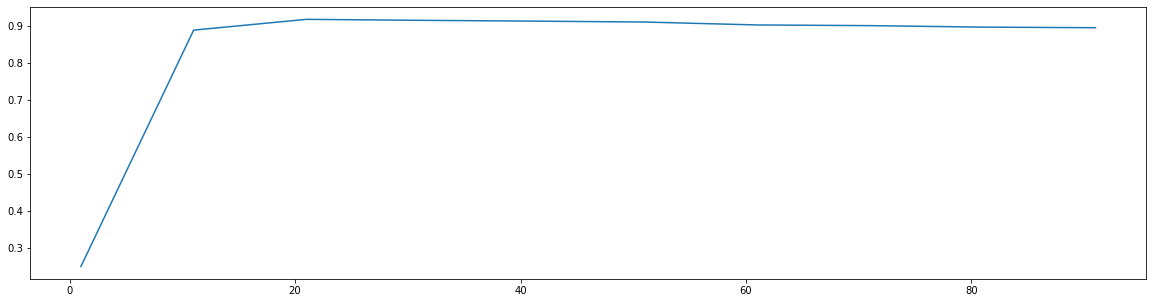

In [8]:
score = []
for i in range(1,101,10): #n_components取1-100中的1,11,21,...,91
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0) #10颗树
                          ,X_dr,y,cv=5).mean() #五折交叉验证，取均值
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

**5.细化学习曲线，找出降维后的最佳维度**

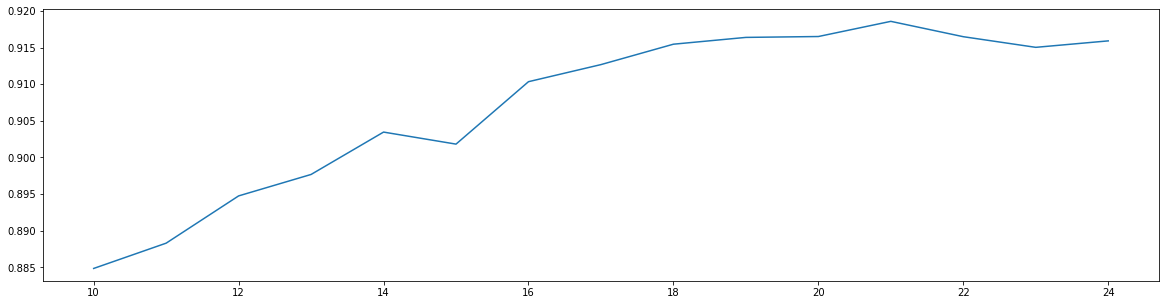

In [9]:
score = []
for i in range(10,25): #n_components取10-24
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()

**6.导入找出的最佳维度进行降维，查看模型效果**

In [10]:
X_dr = PCA(21).fit_transform(X)

In [11]:
X_dr.shape

(42000, 21)

In [12]:
cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean() #生成100颗树

0.9435238095238094

模型效果还好，跑出了94.35%的水平，但还是没有使用嵌入法特征选择过后的96%高。

**7.特征数量已经不足原来的3%，换模型（KNN）怎么样？**

In [13]:
cross_val_score(KNN(),X_dr,y,cv=5).mean()

0.9674523809523811

**8.KNN的k值学习曲线**

In [14]:
X_dr = PCA(21).fit_transform(X)

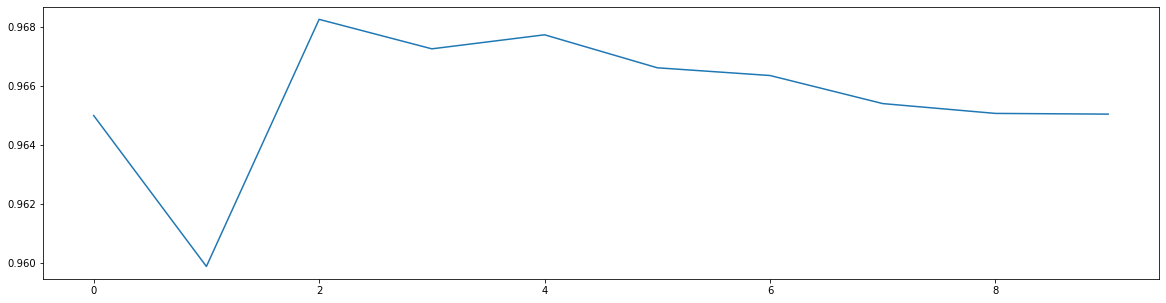

In [15]:
score = []
for i in range(10):
    once = cross_val_score(KNN(i+1),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()

**9.定下超参数后，模型效果如何，模型运行时间如何？**

In [18]:
cross_val_score(KNN(3),X_dr,y,cv=5).mean()

0.9682619047619048

In [19]:
%%timeit
cross_val_score(KNN(3),X_dr,y,cv=5).mean()

49.7 s ± 5.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


可以发现，原本785列的特征被我们缩减到21个主成分之后，用KNN跑出了目前这个数据集上最好的结果。